In [2]:
# import library
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import scipy.stats as st

from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

#data prosesing

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from feature_engine import transformation as vt
from sklearn.model_selection import StratifiedKFold

In [3]:
# read dataset
df = pd.read_csv('dataset/train.csv', sep=';')

# 1. Descriptive Statistics 

## Tipe data 

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Kolom categorical 

In [289]:
cat = df.select_dtypes(include='object')
catCol = cat.columns
print(f'Ada {len(catCol)} kolom categorical, yaitu:\n{catCol}')

Ada 10 kolom categorical, yaitu:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


## Kolom numerik 

In [290]:
num = df.select_dtypes(include=['int64', 'float64'])
numCol = num.columns
print(f'Ada {len(numCol)} kolom categorical, yaitu:\n{numCol}')

Ada 7 kolom categorical, yaitu:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


## Check null values

In [291]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Check duplicate  

In [292]:
df.duplicated().sum()

0

## Summary kolom 

In [293]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Describe kolom numeric 

In [294]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Pada kolom balance, duration, dan pdays ada jarak yang cukup besar antara mean dengan mediannya. Kemungkinan pada ketiga kolom tersebut terdapat outliers.

### Describe kolom categoric 

In [295]:
df[catCol].describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### Value counts tiap kolom categoric

In [296]:
for col in catCol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value counts kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value counts kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value counts kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value counts kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value counts kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value counts kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value counts kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov 

## Kesimpulan

Semua tipe data dan nama kolom sudah sesuai

Tidak ada nilai kosong <br>
Tidak ada data duplikat

Ada nilai **minus** pada kolom **balance** dan **pdays**. <br>
Terdapat **gap** yang **besar** antara **nilai** pada kolom **y**, **default** dan **loan** <br> 
Perlu di handle pada pembersihan data.

# 2. Univariate Analysis

## Box plot kolom numeric 

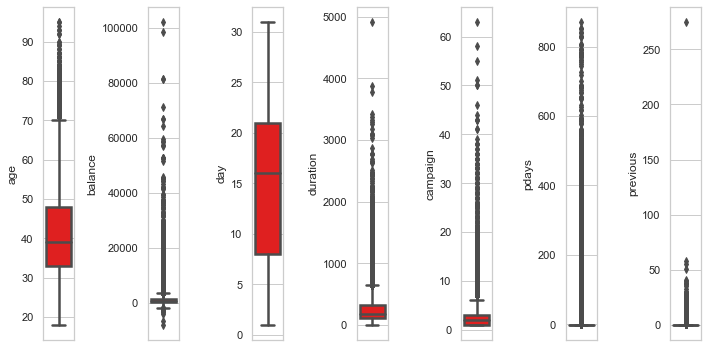

In [297]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.boxplot(y=df[numCol[i]], color='red', orient='v')
    plt.tight_layout()

Semua kolom **punya** outliers, yang **paling banyak** ada pada kolom **balance**, **duration**, dan **pdays**

## Violin plot kolom numeric 

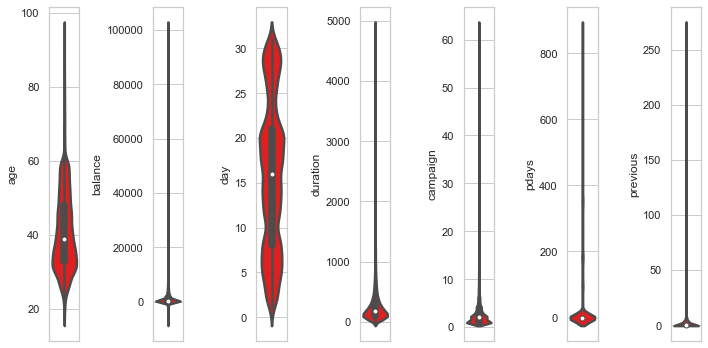

In [298]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.violinplot(y=df[numCol[i]], color='red', orient='v')
    plt.tight_layout()

## individual displot kolom numeric

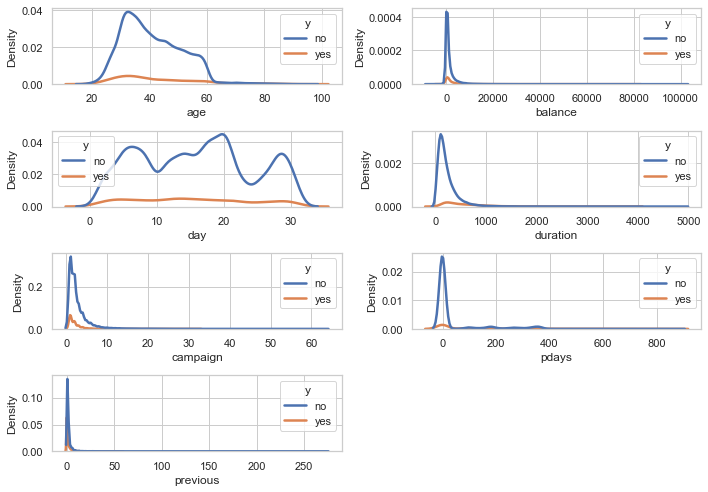

In [299]:
for i in range(0, len(numCol)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numCol[i]], color='red', hue=df['y'])
    plt.xlabel(numCol[i])
    plt.tight_layout()

**Hampir semua** kolom **numeric** **tidak berdistribusi normal**. <br>
Kolom **campaign**, **previous**, **duration**, dan **pdays** **tidak berdistribusi normal** (**positively skew**). <br>
Sedangkan kolom **day** berbentuk **bimodal**.

In [300]:
df1 = df.copy()

In [301]:
encoding_y = {
    'yes': 1,
    'no': 0
}

In [302]:
df1['y'] = df1['y'].map(encoding_y)

## individual countplot kolom categorical

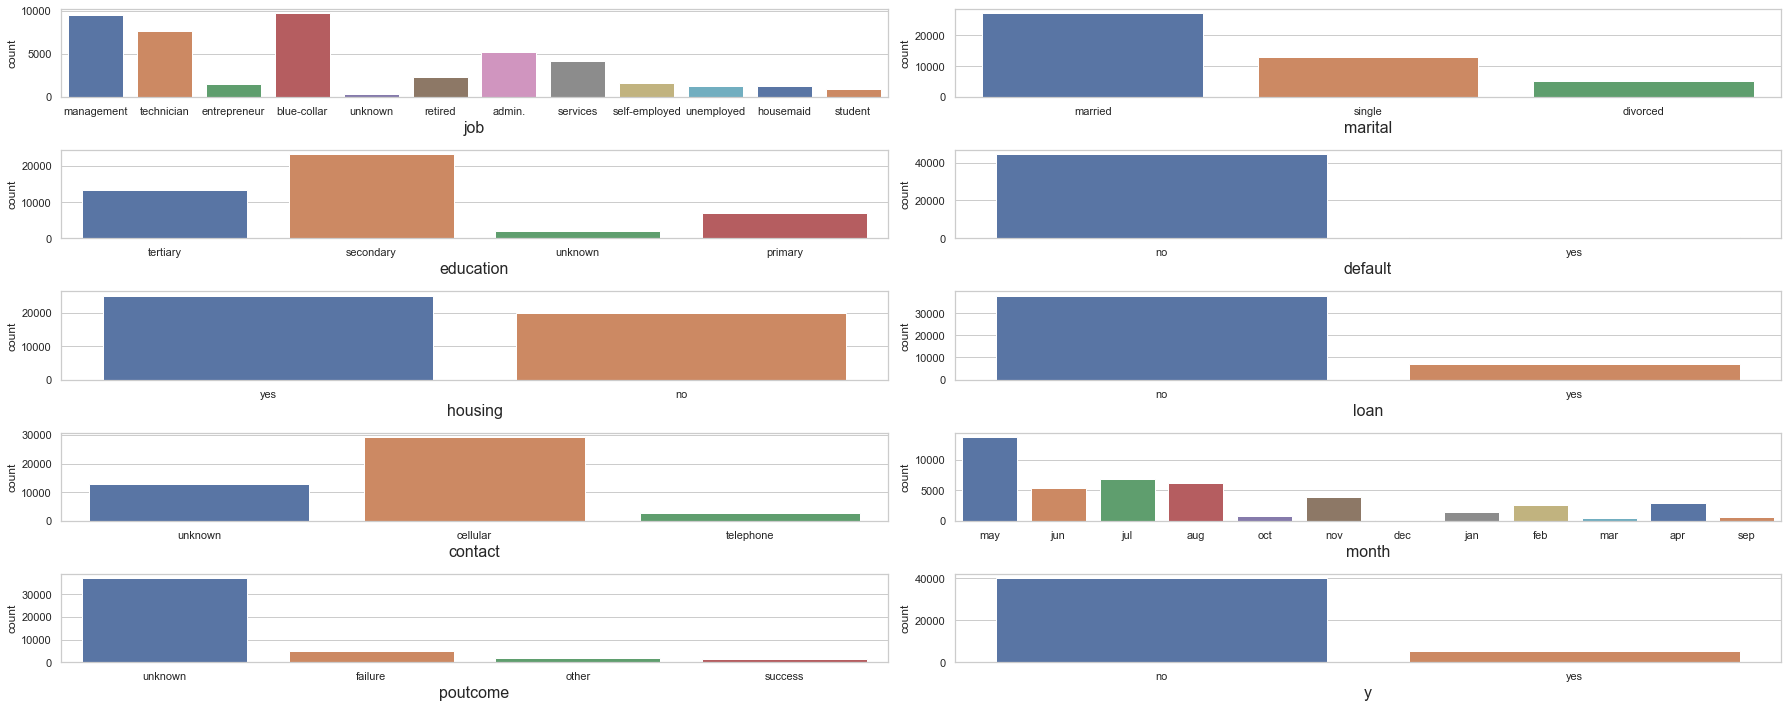

In [303]:
plt.figure(figsize = (25,10))
for i in range(0, len(catCol)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[catCol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catCol[i],fontsize=16)

Kolom **y** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **loan** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **default** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>

# 3. Multivariate analysis

## Heatmap 

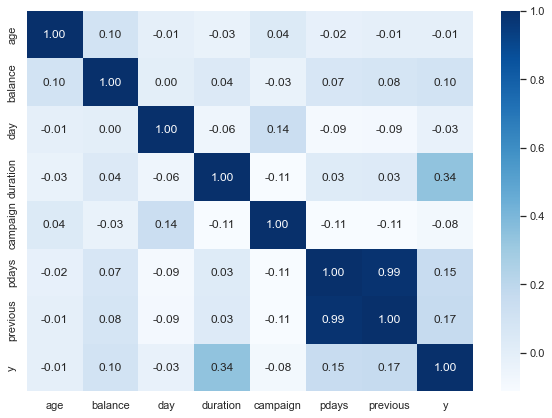

In [304]:
sns.heatmap(df1.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Karena hampir semua data belum berdistribusi normal, maka korelasi akan menggunakan korelasi spearman

Hampir semua kolom **tidak mempunyai** korelasi yang **kuat**. <br>
hanya ada kolom **pdays** dengan kolom **previous** dengan **nilai** korelasi mencapai **0.99**, bertanda redundant yang perlu dihandle<br>

## Pair Plot kolom numeric 

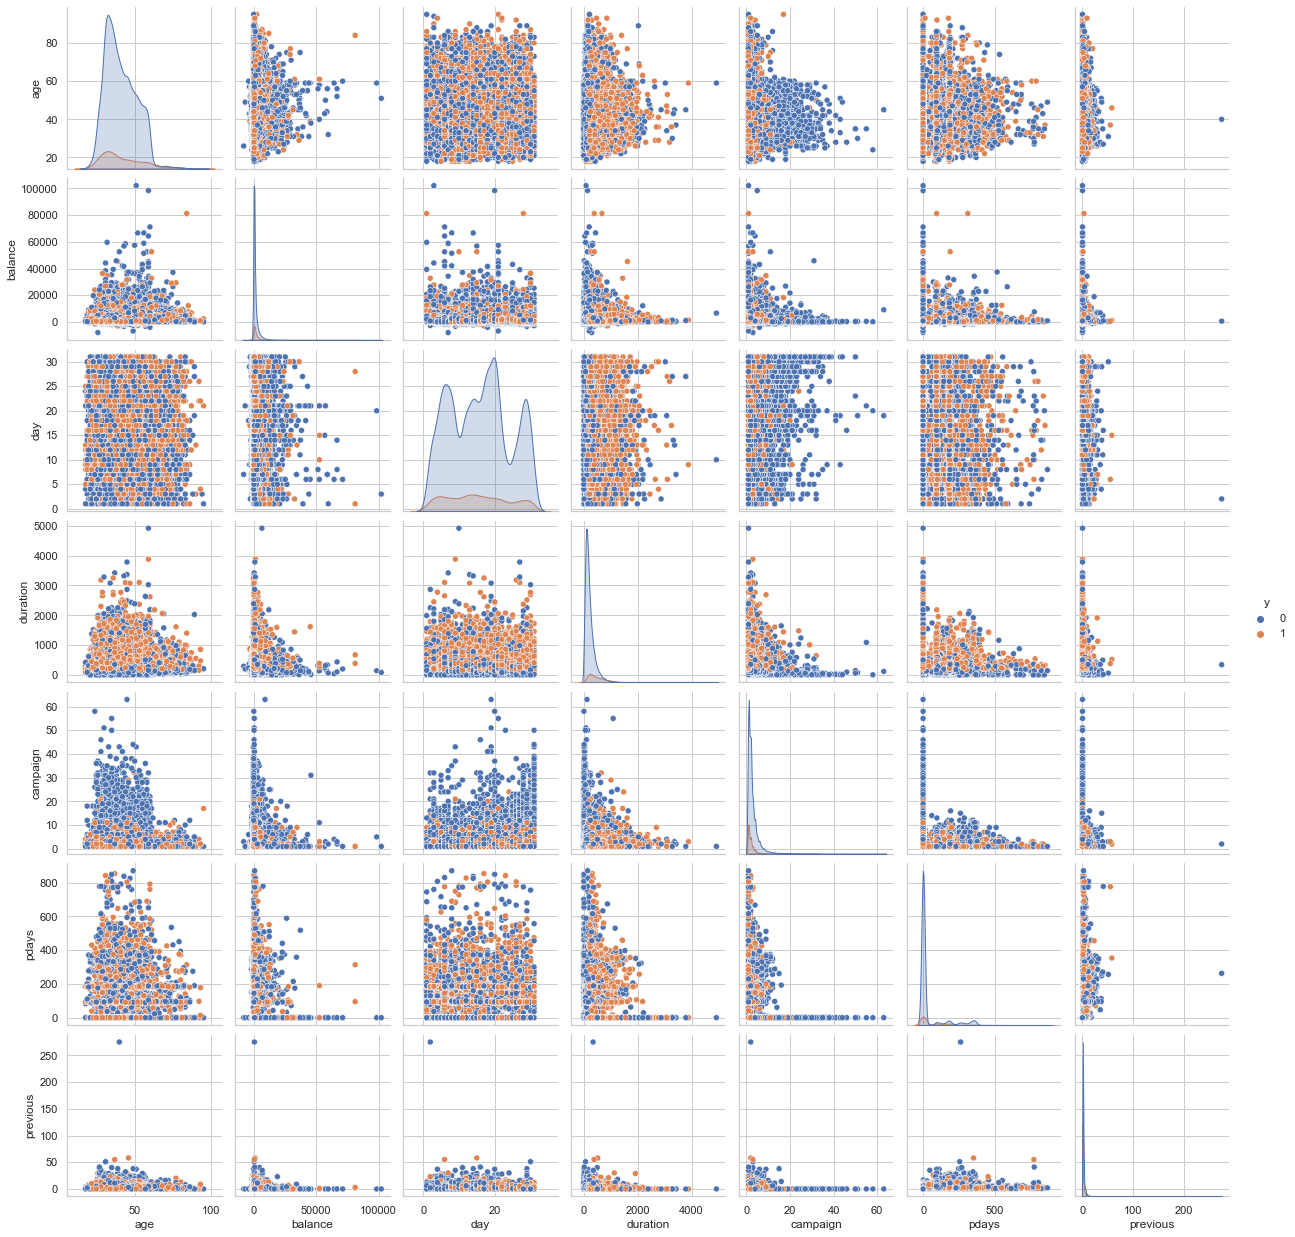

In [305]:
sns.pairplot(df1, diag_kind='kde', hue='y')
plt.show()

## Strip plot kolom categorical dengan kolom kolom numeric

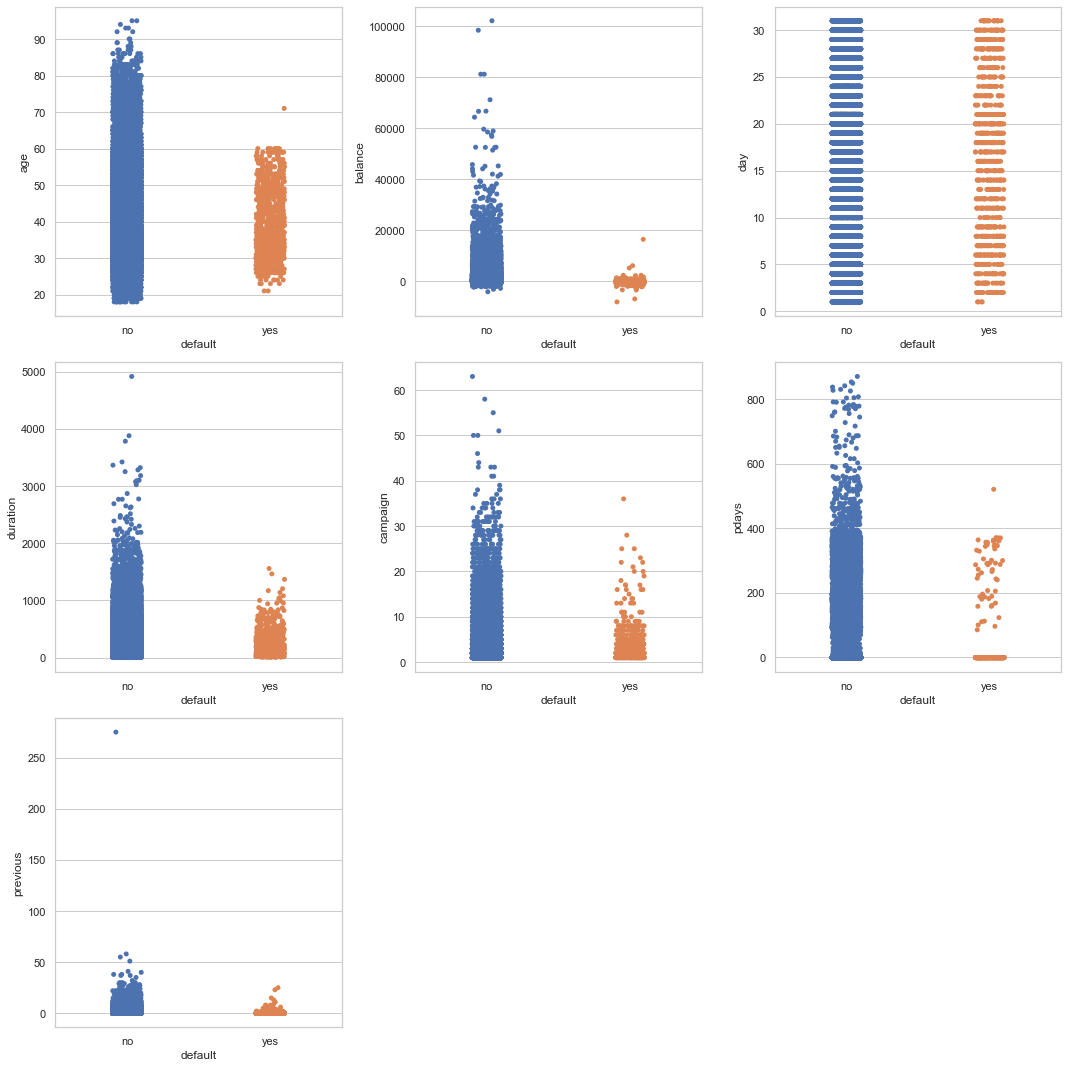

In [306]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numCol)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax = ax, data=df, x='default', y=numCol[i])
    plt.tight_layout()

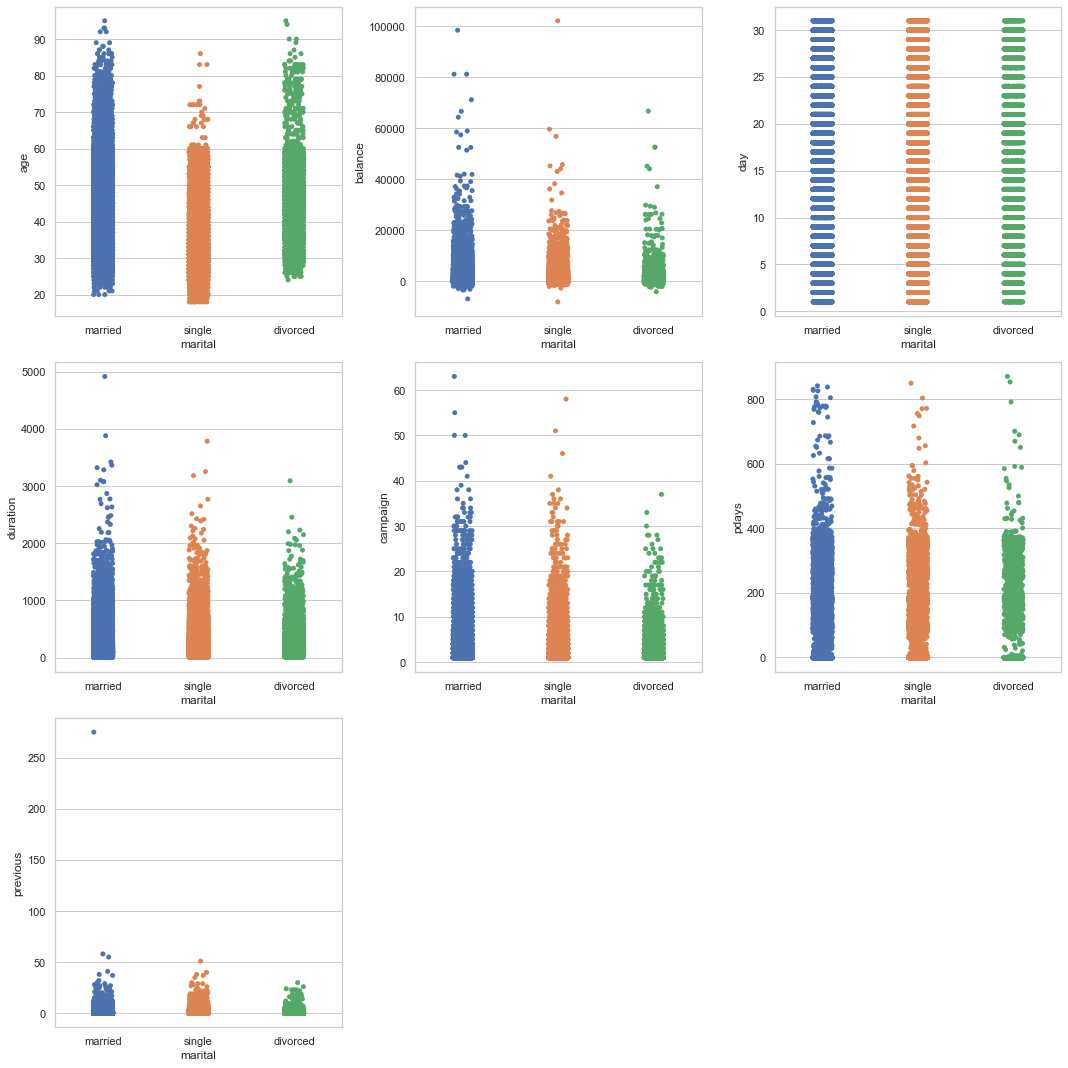

In [307]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='marital', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

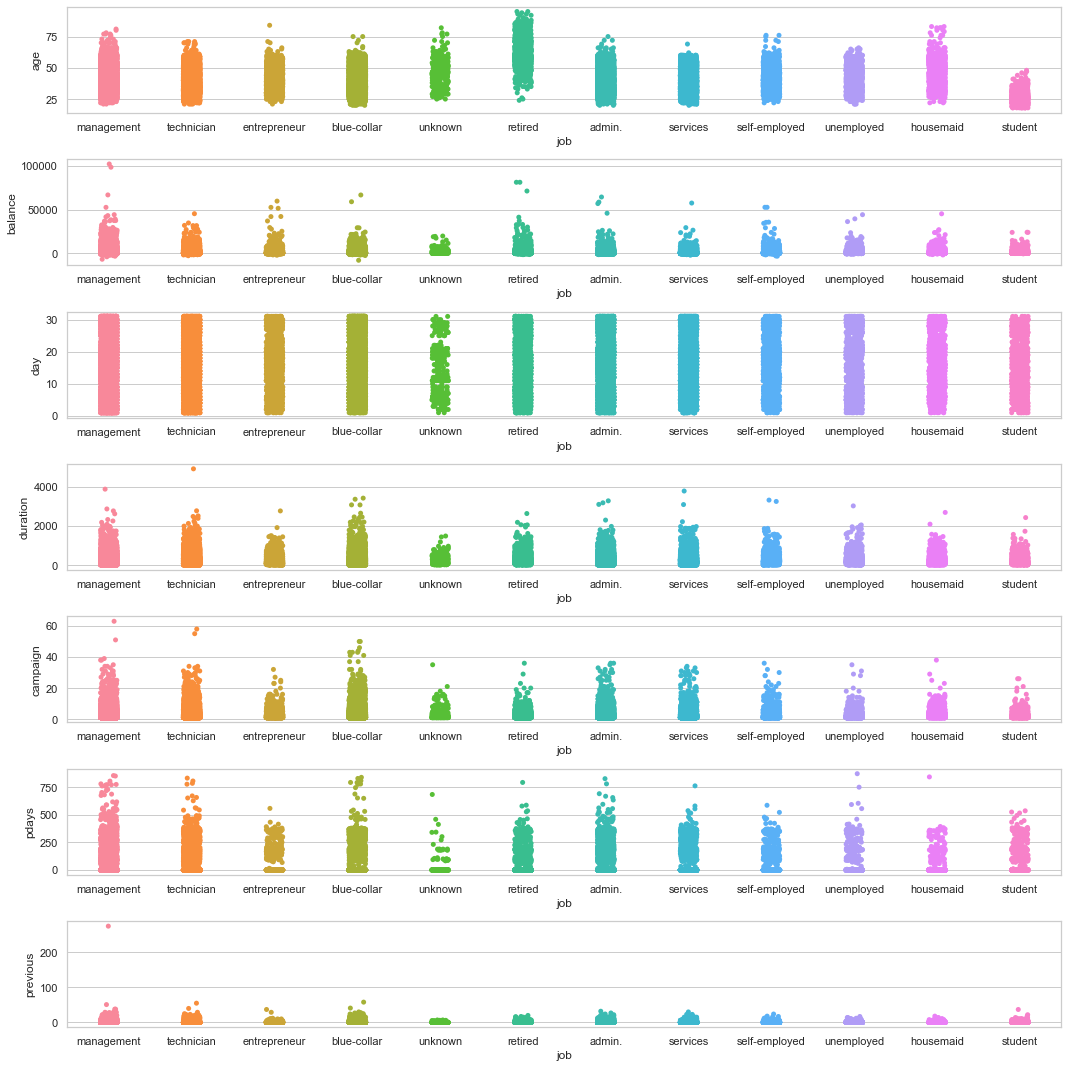

In [308]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 1, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='job', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

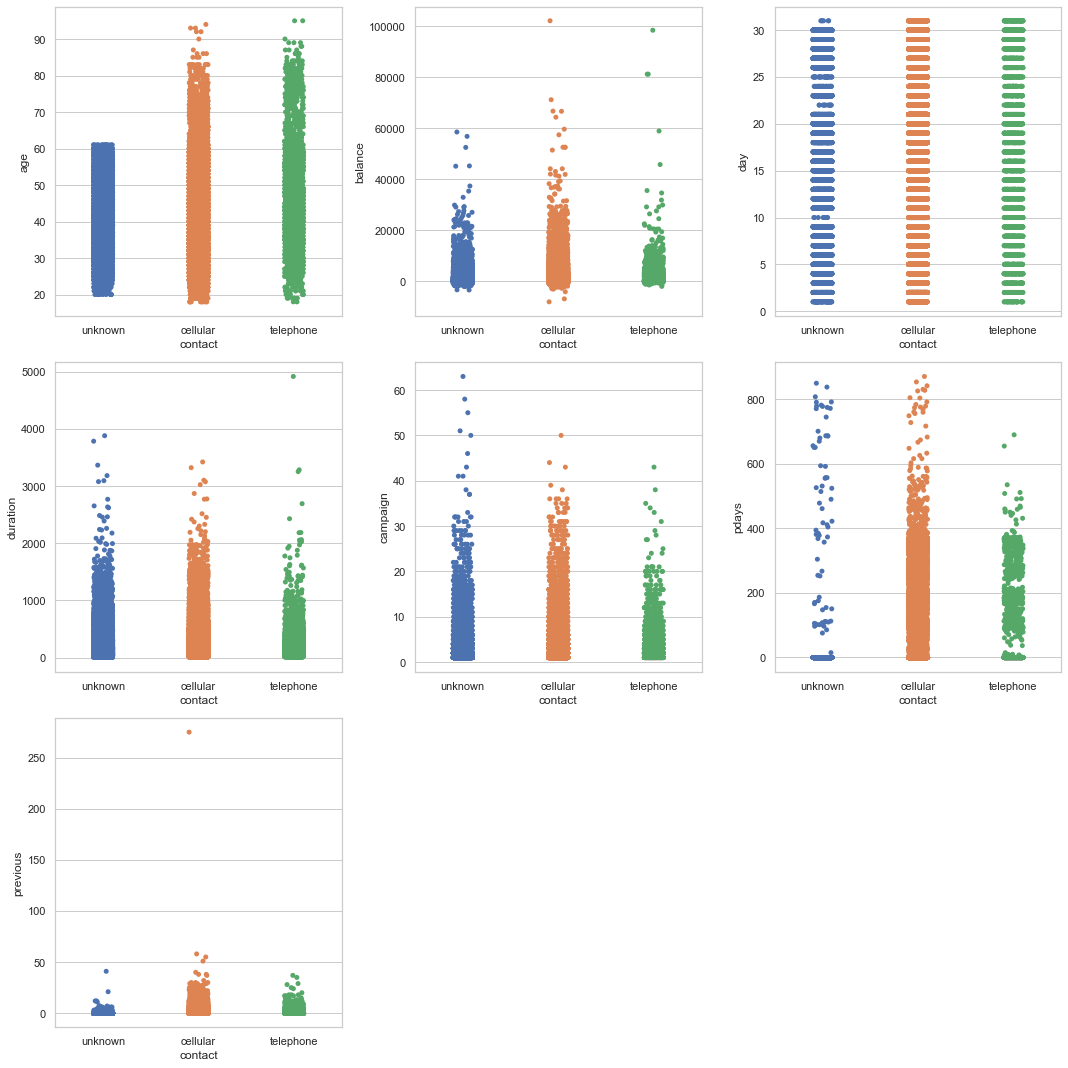

In [309]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

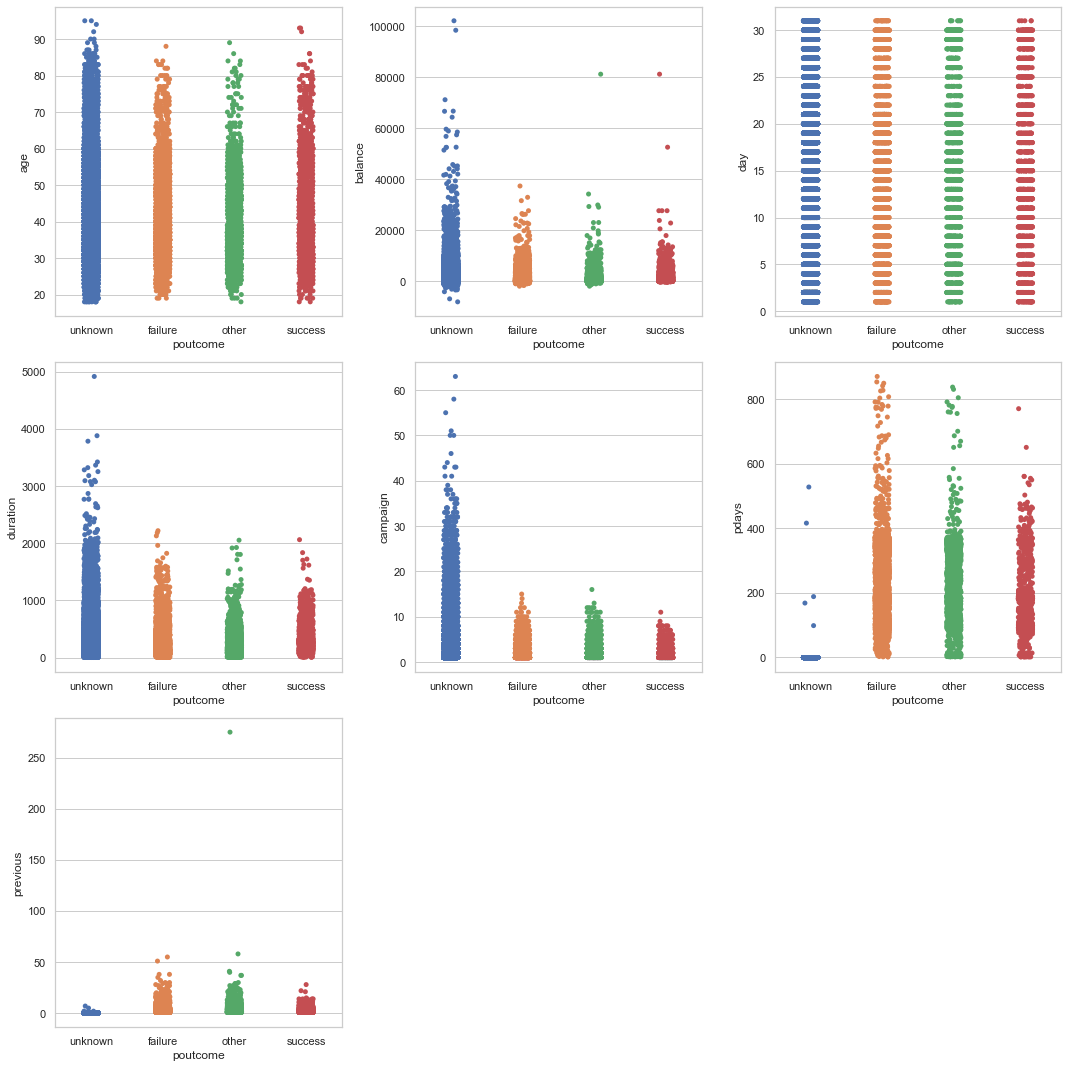

In [310]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='poutcome', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

## Kesimpulan 

Tidak ada hasil yang menarik dari strip plot beberapa kolom categorical dengan kolom numeric

# 4. Business Insight

In [311]:
mapping_y = {'yes': 1,
             'no': 0}

df['y'] = df['y'].map(mapping_y)
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2075,59,retired,divorced,primary,no,121,yes,no,unknown,12,may,144,7,-1,0,unknown,0
10482,48,technician,married,unknown,no,5543,no,no,unknown,16,jun,143,5,-1,0,unknown,0
4285,27,technician,single,secondary,no,16,no,no,unknown,19,may,193,1,-1,0,unknown,0


## Default and Loan

In [312]:
df_default = df.groupby('default')['y'].mean()
df_loan = df.groupby('loan')['y'].mean()
print('\n', df_default)
print('\n', df_loan)


 default
no     0.117961
yes    0.063804
Name: y, dtype: float64

 loan
no     0.126557
yes    0.066814
Name: y, dtype: float64


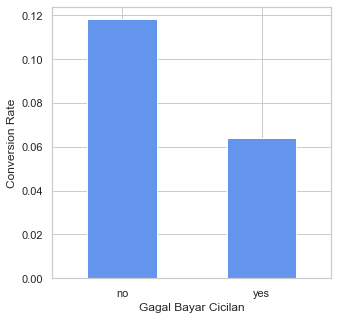

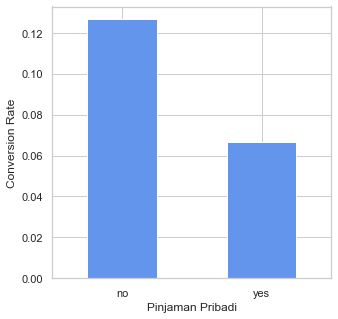

In [313]:
plt.figure(figsize=(5,5))
df_default.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Gagal Bayar Cicilan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

plt.figure(figsize=(5,5))
df_loan.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pinjaman Pribadi', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:** <br>
Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi, dengan conversion rate 10-11%.

## Month

In [314]:
df_month = df.groupby('month')['y'].mean()
df_month = df_month.sort_values(ascending=False)
df_month

month
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: y, dtype: float64

In [315]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

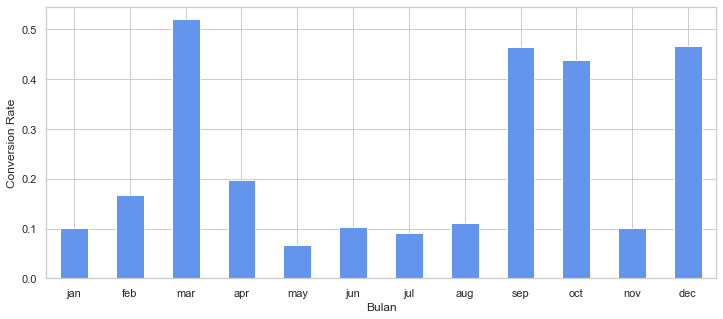

In [316]:
plt.figure(figsize=(12,5))
df_month.loc[month_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun/libur musim dingin(Desember).

## Job

In [317]:
df_job = df.groupby('job')['y'].mean()
df_job

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

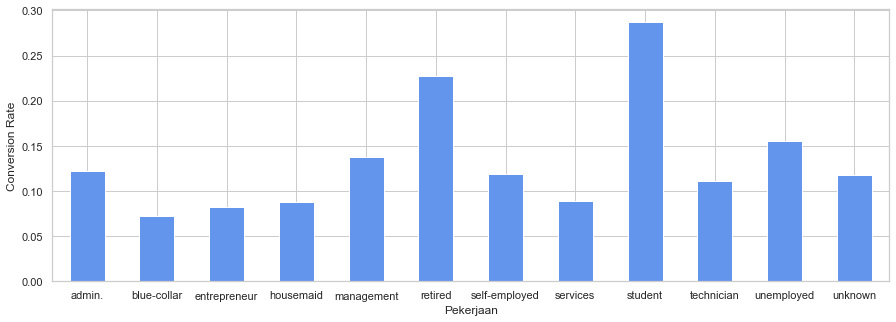

In [318]:
plt.figure(figsize=(15,5))
df_job.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Pekerjaan di bidang management paling tinggi conversion ratenya (2,9%)


## Status

In [319]:
df_marital = df.groupby('marital')['y'].sum()/(df['y'].count())
df_marital

marital
divorced    0.013758
married     0.060936
single      0.042291
Name: y, dtype: float64

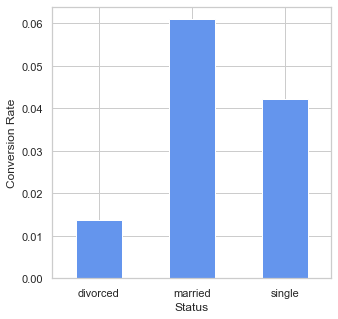

In [320]:
plt.figure(figsize=(5,5))
df_marital.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan status sudah menikah paling tinggi conversion ratenya (6%)


## Education

In [321]:
df_education = df.groupby('education')['y'].sum()/(df['y'].count())
df_education

education
primary      0.013072
secondary    0.054190
tertiary     0.044149
unknown      0.005574
Name: y, dtype: float64

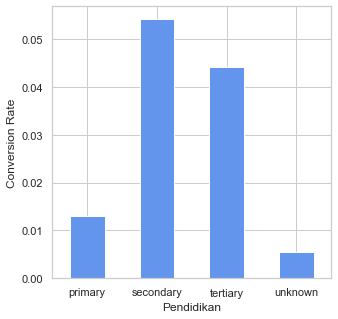

In [322]:
plt.figure(figsize=(5,5))
df_education.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pendidikan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan pendidikan secondary sudah menikah paling tinggi conversion ratenya (6%)


## Contact

In [323]:
df_contact = df.groupby('contact')['y'].sum()/(df['y'].count())
df_contact

contact
cellular     0.096636
telephone    0.008626
unknown      0.011723
Name: y, dtype: float64

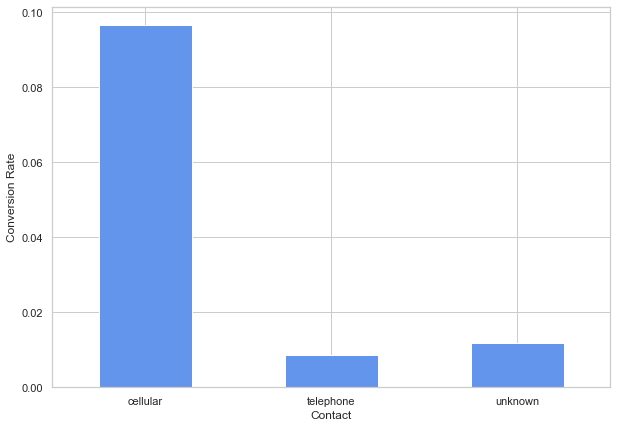

In [324]:
df_contact.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Contact', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah paling banyak mengambil deposito saat dihubungi ke nomor ponselnya dengan conversion rate 9.7%.

## Housing

In [325]:
df_housing = df.groupby('housing')['y'].sum()/(df['y'].count())
df_housing

housing
no     0.074185
yes    0.042799
Name: y, dtype: float64

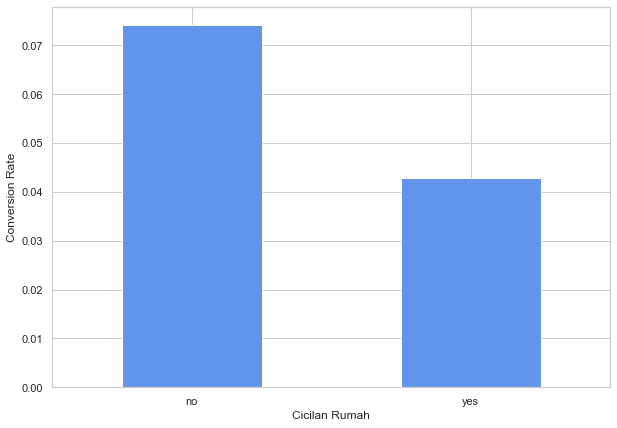

In [326]:
df_housing.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Cicilan Rumah', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah yang tidak punya cicilan rumah adalah yang paling banyak mengambil deposito dengan conversion rate 7.4%.

In [327]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Age

In [328]:
age_group = []
for x in df['age']:
    if x <=24 :
        age_group.append('early working')
    elif x <=54 :
        age_group.append('prime working')
    elif x <=64 :
        age_group.append('mature working')
    else:
        age_group.append('elderly')

df['age_group'] = age_group


In [329]:
age_order = ['early working', 'prime working', 'mature working', 'elderly']

In [330]:
df_age = df.groupby('age_group')['y'].sum()/(df['y'].count())
df_age = df_age.sort_values(ascending=False)
df_age

age_group
prime working     0.090686
mature working    0.014178
elderly           0.007542
early working     0.004579
Name: y, dtype: float64

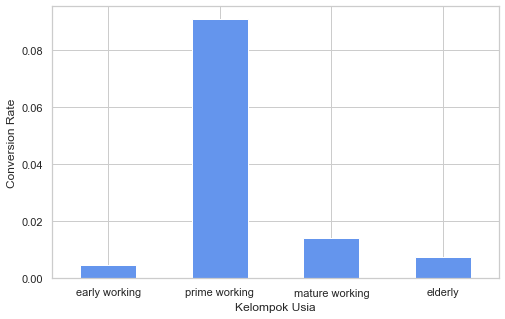

In [331]:
plt.figure(figsize=(8,5))
df_age.loc[age_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito dengan conversion rate 9%.

## Balance

In [332]:
balance_group = []
for x in df['balance']:
    if x < 0:
        balance_group.append('<0')
    elif x <= 5000:
        balance_group.append('0-5000')
    elif x <= 10000:
        balance_group.append('5001-10000')
    elif x <= 25000:
        balance_group.append('10001-25000')
    else:
        balance_group.append('25000+')
        
df['balance_group'] = balance_group

In [333]:
balance_order = ['<0', '0-5000', '5001-10000', '10001-25000', '25000+']

In [334]:
df_balance = df.groupby('balance_group')['y'].sum()/(df['y'].count())
df_balance = df_balance.sort_values(ascending=False)
df_balance

balance_group
0-5000         0.102586
5001-10000     0.006768
<0             0.004645
10001-25000    0.002610
25000+         0.000376
Name: y, dtype: float64

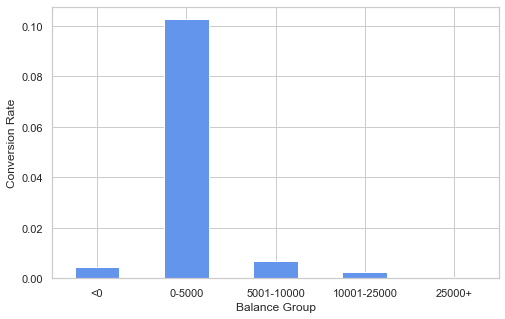

In [335]:
plt.figure(figsize=(8,5))
df_balance.loc[balance_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Balance Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito dengan conversion rate 10.2%.

## Contact

In [336]:
def segment(x):
    if x['pdays'] == -1:
        segment = 'No contact'
    else:
        segment = 'Contacted'
    return segment

df['pdays_group'] = df.apply(lambda x: segment(x), axis = 1)

In [337]:
pdays_order = ['No contact', 'Contacted']

In [338]:
df_pdays = df.groupby('pdays_group')['y'].sum()/(df['y'].count())
df_pdays

pdays_group
Contacted     0.042136
No contact    0.074849
Name: y, dtype: float64

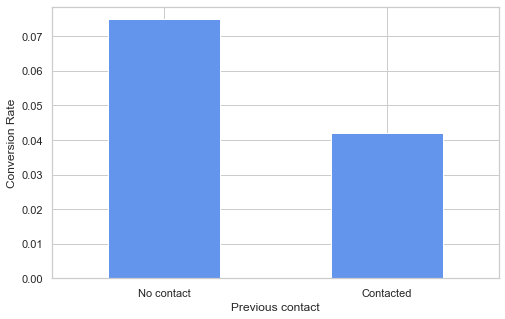

In [339]:
plt.figure(figsize=(8,5))
df_pdays.loc[pdays_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Previous contact', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah yang sama sekali belum pernah dikontak sebelumnya dan memilih untuk mengambil deposito memiliki conversion rate 7.5%.

## Duration tipe 1

In [340]:
duration_group = []
for x in df['duration']:
    if x <= 180 :
        duration_group.append('0-3')
    elif x <= 360 :
        duration_group.append('3-6')
    elif x <= 540 :
        duration_group.append('6-9')
    elif x <= 720 :
        duration_group.append('9-12')
    elif x <= 900 :
        duration_group.append('12-15')
    elif x <= 1080:
        duration_group.append('15-18')
    elif x <= 1260:
        duration_group.append('18-21')
    elif x <= 1440:
        duration_group.append('22-25')
    elif x <= 1620:
        duration_group.append('25-28')
    else:
        duration_group.append('28+')

df['duration_group'] = duration_group

In [341]:
duration_order = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','22-25','25-28','28+']

In [342]:
df_duration = df.groupby('duration_group')['y'].sum()/(df['y'].count())
df_duration

duration_group
0-3      0.015682
12-15    0.010882
15-18    0.007609
18-21    0.004689
22-25    0.002522
25-28    0.001769
28+      0.001991
3-6      0.033930
6-9      0.021278
9-12     0.016633
Name: y, dtype: float64

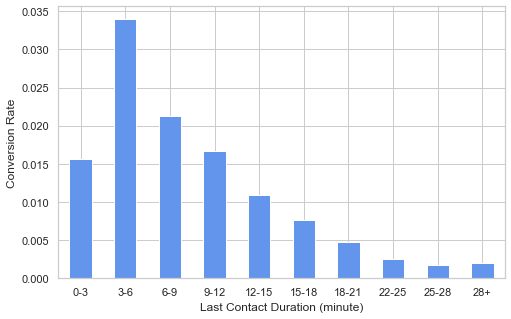

In [343]:
plt.figure(figsize=(8,5))
df_duration.loc[duration_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Last Contact Duration (minute)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan durasi telepon terakhir 3-6 menit memiliki conversion rate tertinggi, yaitu 3.4%.

## Duration tipe 2

In [344]:
duration_group = []
for x in df['duration']:
    if x <= 60 :
        duration_group.append('1')
    elif x <= 120 :
        duration_group.append('2')
    elif x <= 180 :
        duration_group.append('3')
    elif x <= 240 :
        duration_group.append('4')
    elif x <= 300 :
        duration_group.append('5')
    elif x <= 360:
        duration_group.append('6')
    elif x <= 420:
        duration_group.append('7')
    elif x <= 480 :
        duration_group.append('8')
    elif x <= 540:
        duration_group.append('9')
    elif x <= 600:
        duration_group.append('10')
    else:
        duration_group.append('10+')

df['duration_group'] = duration_group

In [345]:
duration_order = ['1','2','3','4', '5', '6', '7','8', '9', '10', '10+']

In [346]:
df_duration = df.groupby('duration_group')['y'].sum()/(df['y'].count())
df_duration

duration_group
1      0.000199
10     0.005552
10+    0.040543
2      0.004468
3      0.011015
4      0.012895
5      0.011922
6      0.009113
7      0.008361
8      0.006680
9      0.006237
Name: y, dtype: float64

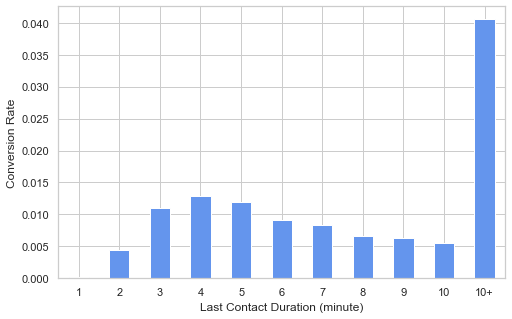

In [347]:
plt.figure(figsize=(8,5))
df_duration.loc[duration_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Last Contact Duration (minute)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

## Campaign 

In [348]:
campaign_group = []
for x in df['campaign']:
    if x < 3 :
        campaign_group.append('1-2')
    elif x <5 :
        campaign_group.append('3-4')
    elif x <7 :
        campaign_group.append('5-6')
    elif x <9 :
        campaign_group.append('7-8')
    elif x <11 :
        campaign_group.append('9-10')
    elif x <13 :
        campaign_group.append('11-12')
    else:
        campaign_group.append('13+')

df['campaign_group'] = campaign_group

In [349]:
campaign_order = ['1-2','3-4','5-6','7-8','9-10','11-12','13+']

In [350]:
df_campaign = df.groupby('campaign_group')['y'].sum()/(df['y'].count())
df_campaign

campaign_group
1-2      0.087634
11-12    0.000442
13+      0.000597
3-4      0.020681
5-6      0.005109
7-8      0.001747
9-10     0.000774
Name: y, dtype: float64

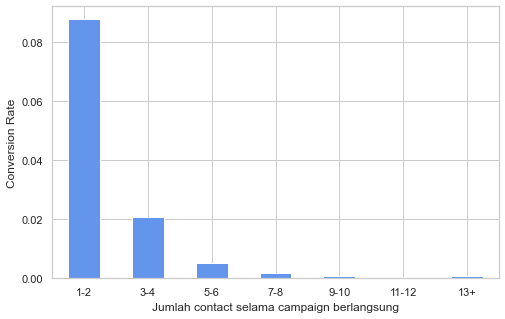

In [351]:
plt.figure(figsize=(8,5))
df_campaign.loc[campaign_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Jumlah contact selama campaign berlangsung', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito dengan conversion rate 8.7%.

## Age & Duration

In [352]:
sns.set_theme(style="whitegrid")

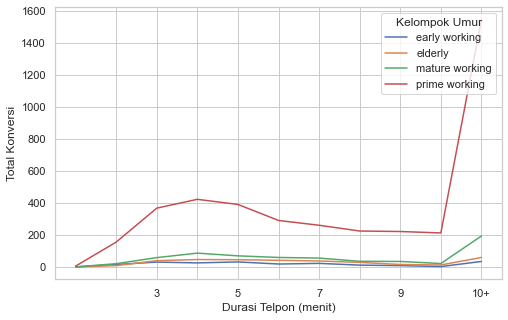

In [353]:
pd.pivot_table(df,index='duration_group',columns='age_group',values='y', aggfunc='sum').loc[duration_order].plot(figsize=(8,5))
plt.legend(loc='upper right', title='Kelompok Umur')
plt.xticks([1,2,3,4,5,6,7,8,9,10], rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Durasi Telpon (menit)', fontsize=12)
plt.ylabel('Total Konversi', fontsize=12)
plt.show()

**Observation:**<br>
Setiap kelompok umur memiliki puncak optimal di durasi telpon 3-6 menit.<br>
Kurva total konversi naik sampai menit ke 3-6, kemudian turun di menit setelahnya.<br>
Kelompok umur prime working memiliki total konversi terbanyak.

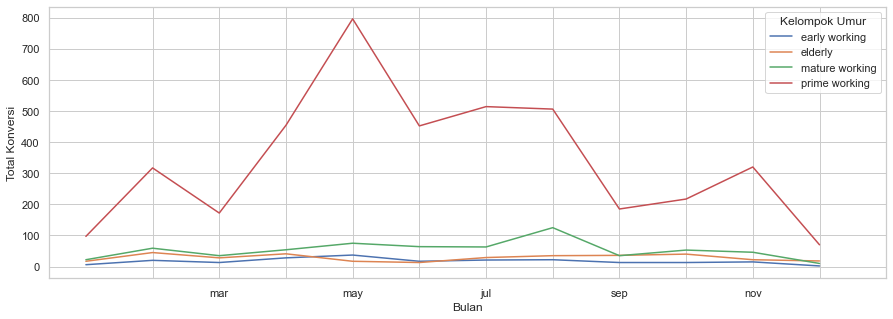

In [354]:
pd.pivot_table(df,index='month',columns="age_group",values="y",aggfunc='sum').loc[month_order].plot(figsize=(15,5))
plt.legend(loc='upper right', title='Kelompok Umur')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Konversi', fontsize=12)
plt.show()

**Observation:**<br>
Kelompok umur prime working memiliki total konversi terbanyak dengan puncak optimal di bulan Mei.<br>
Kelompok umur mature working memiliki puncak optimal di bulan Agustus.<br>

## Duration and Campaign

In [355]:
df['minute'] = df['duration'].apply(lambda x: x/60)

<Figure size 720x360 with 0 Axes>

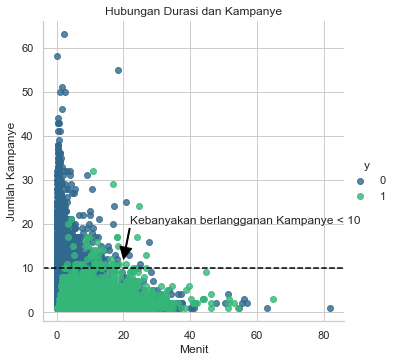

In [356]:
plt.figure(figsize=(10,5))
sns.lmplot(x='minute',y='campaign', hue='y', data=df, fit_reg=False, palette='viridis')
plt.title('Hubungan Durasi dan Kampanye')
plt.axhline(y=10, ls='--', c='black')
plt.annotate('Kebanyakan berlangganan Kampanye < 10',xytext = (22,20),
             arrowprops=dict(color = 'black', width=1),xy=(20,12))
plt.xlabel('Menit')
plt.ylabel('Jumlah Kampanye')
plt.show()

**Observation:**<br>
Calon nasabah yang dikampanye kurang dari 10 kali dan dihubungi dengan durasi kurang dari 20 menit berpotensi membuka tabungan deposito berjangka

## Age and Balance

In [4]:
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 0 else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

1    45211
Name: response_binary, dtype: int64

In [358]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

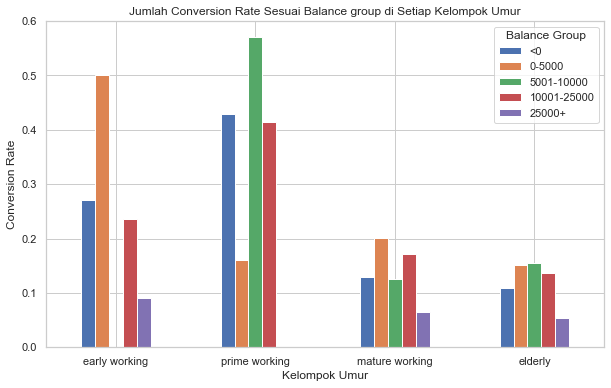

In [359]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(4),('early working', 'prime working', 'mature working', 'elderly'),rotation = 'horizontal')

# Set legend
plt.legend(['<0', '0-5000', '5001-10000', '10001-25000', '25000+'], loc='upper right', title='Balance Group', ncol = 1)
plt.ylabel('Conversion Rate')
plt.xlabel('Kelompok Umur')
plt.title('Jumlah Conversion Rate Sesuai Balance group di Setiap Kelompok Umur')
plt.show()

**Insight** Pelanggan 'ya' untuk kelompok usia yang berbeda: keinginan untuk berlangganan sangat tinggi untuk orang berusia di antara 25-54 tahun dan orang yang lebih muda berusia di bawah 25 tahun juga memiliki tingkat berlangganan yang lebih tinggi daripada kelompok usia lainnya. Bank harus memprioritaskan telemarketingnya kepada klien yang berusia di di antara 25-54 yang memiliki saldo di antara 5001-25000, karena mereka memiliki tingkat penerimaan tertinggi sekitar 13.9% . Kelompok berikutnya yang harus menjadi fokus bank adalah kelomopk early working dengan saldo 0-5000, yang menunjukkan tingkat berlangganan yang tinggi antara 5%.

# Insight yang didapat

1. Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi, dengan conversion rate 10-11%.
2. Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun/libur musim dingin(Desember).
3. Pekerjaan di bidang management paling tinggi conversion ratenya (2,9%).
4. Nasabah dengan status sudah menikah paling tinggi conversion ratenya (6%).
5. Nasabah dengan pendidikan secondary sudah menikah paling tinggi conversion ratenya (6%).
6. Nasabah paling banyak mengambil deposito saat dihubungi ke nomor ponselnya dengan conversion rate 9.7%.
7. Nasabah yang tidak punya cicilan rumah adalah yang paling banyak mengambil deposito dengan conversion rate 7.4%.
8. Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito dengan conversion rate 9%.
9. Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito dengan conversion rate 10.2%.
10. Nasabah yang sama sekali belum pernah dikontak sebelumnya dan memilih untuk mengambil deposito memiliki conversion rate 7.5%.
11. Nasabah dengan durasi telepon terakhir 3-6 menit memiliki conversion rate tertinggi, yaitu 3.4%
12. Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito dengan conversion rate 8.7%.
13. Setiap kelompok umur memiliki puncak optimal di durasi telpon 3-6 menit. 
    Kurva total konversi naik sampai menit ke 3-6, kemudian turun di menit setelahnya.
    Kelompok umur prime working memiliki total konversi terbanyak.
14. Kelompok umur prime working memiliki total konversi terbanyak dengan puncak optimal di bulan Mei.
    Kelompok umur mature working memiliki puncak optimal di bulan Agustus.

### Pihak marketing bank bisa melakukan campaign khusus di bulan Mei kepada Nasabah yang memiliki Balance/Tabungan tahunan dibawah 5000 euro dengan ketentuan :
#### 1. Nasabah tidak memiliki riwayat kredit macet dan tidak punya kredit
#### 2. Nasabah telah menikah dengan range umur 25-54 tahun
#### 3. Melakukan panggilan ke nomor ponsel nasabah dengan cara 1-2 kali kontak selama campaign

# Data Preprocessing

In [360]:
#membuang kolom kategorikal
drop_col = ['response', 'age_group', 'balance_group',
            'pdays_group', 'duration_group', 'campaign_group', 'minute']
df_new = df.drop(drop_col,axis=1)

In [109]:
#mengelompokan variabel berdasarkan tipe data kategorik dan numerikal
cats = []
nums = []

for i in df_new.columns:
    if df_new[i].dtype != 'object':
        nums.append(i)
    else:
        cats.append(i)
        
print('Numerikal', nums)
print('Kategorikal', cats)

Numerikal ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response_binary']
Kategorikal ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  campaign         45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  previous         45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  response_binary  45211 non-null  uint8 
dtypes: int64(7), object(9), uint8(1)
mem

### Handling Missing or Invalid Value

In [35]:
# cek nilai kosong

df_new.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response_binary    0
dtype: int64

In [36]:
#Cek berapa banyak data pada nilai di tiap kolom kategorikal
for col in cats:
    print('Value counts column :', col)
    print('================')
    print(df_new[col].value_counts())
    print('\n')

Value counts column : job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Value counts column : marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Value counts column : education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Value counts column : default
no     44396
yes      815
Name: default, dtype: int64


Value counts column : housing
yes    25130
no     20081
Name: housing, dtype: int64


Value counts column : loan
no     37967
yes     7244
Name: loan, dtype: int64


Value counts column : contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


Value counts column : month
may    13766
jul     6895
aug    

**Pengamatan**
1. Tampaknya secara sekilas tidak ada data yang mempunya nilai null akan tetapi ada nilai yang 'uknown' dan 'others'
2. didalam kolom job ada tipo admin
3. kolom yang mempunyai nilai binary harus di convert kedalam bentuk numerical
4. selain binary harus dilakukan encoding

In [111]:
#ubah tipo pada admin.
df_new['job'] = df_new['job'].replace('admin.','admin')

**Optional**<br>Apabila ingin mereplace nilai unknown jalankan sel dibawah ini

#replace unknown to mode
unknown_col = ['job','education','contact']
for x in unknown_col:
    df[x] = df[x].replace('unknown',df[x].mode()[0])

## Handling Duplicated Data

In [112]:
#cek duplicat
df.duplicated().sum()

0

**Pengamatan**<br>
Data duplicat tidak ada, sehingga tidak perlu di handle

## Feature Encoding

In [113]:
#Mengkonversi Kolom yang mempunyai nilai binary menggunakan get_dummies, ambil yang kolom nilai yes = 1
binary = ['default','housing','loan']
df_new[binary] = pd.get_dummies(df_new[binary], drop_first=True)

In [114]:
df_new[binary]

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


In [115]:
# cek kolom yang nilainya kategorikal
df_new.select_dtypes(include='object')

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


**Pengamatan**
1. Kolom Education Merupakan Ordinal Value Sehingga Harus di Mapping
2. untuk kolom job, month sebaiknya di Label Encoding, 
3. kolom job di LE berdasarkan gaji sedangkan month berdasarkan urutan bulan
4. Marital, Contact di One Hot
5. demikian juga poutcome di One Hot

In [116]:
#ambil kategorikal
to_cat = df_new.select_dtypes(include='object').columns.to_list()

In [117]:
#Encoding pendidikan karena hirarki
df_new.education = df_new.education.map({
    'unknown':0,
    'primary':1,
    'secondary':2,
    'tertiary':3
})

In [118]:
# mapping bulan sesuai urutannya
df_new.month = df_new.month.map({
    'jan':1, 
    'feb':2, 
    'mar':3, 
    'apr':4, 
    'may':5, 
    'jun':6, 
    'jul':7, 
    'aug':8, 
    'sep':9, 
    'oct':10, 
    'nov':11, 
    'dec':12
    })

In [119]:
#mapping job sesuai gajinya
"""
Management 46.537/yr (11)
Entrepreneur = rangenya pasti luas, taruh dibawah management (10)
Self-employed/freelancer 30.000/yr (9) 
Technician 22.353/yr (8)
Blue-collar 17.645/yr (7)
Admin  1.420/bulan = 17.040/yr (6)
Services 12.434/yr (5)
Housmaid 9.876/yr  (4)
Student/part-time 600/bulan = 7.200/yr (3)
Retired 300/month = 3.600/yr (2)
Unemployed = 0 (1)

"""

df_new.job = df_new.job.map({
    'management': 11,                     
    'entrepreneur':10,
    'self-employed':9,
    'technician':8,
    'blue-collar' : 7,
    'admin': 6, 
    'services':5,    
    'housemaid':4,
    'student':3,
    'retired': 2, 
    'unemployed': 1,
    'unknown':0,
})

In [120]:
#OnHot Pada kolom job
oh_cat = ['marital','contact', 'poutcome']
df_oh = pd.get_dummies(df_new[oh_cat])

In [121]:
# drop kolom yg mempunyai nilai unknow dan others

for x in df_oh.columns:
    if 'unknown' in x or 'other' in x:
        df_oh.drop(x, axis=1, inplace=True)

In [122]:
# cek kolom yang di one hot apakah nilai unknown dan others sudah dihapus
df_oh.columns

Index(['marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')

In [123]:
#gabung df oh dan encoding
concat_enc = df_new[cats].drop(oh_cat,axis=1).merge(df_oh, left_index=True, right_index=True)

In [124]:
# untuk seleksi fitur
x_cat = concat_enc
y_cat = df_new['response_binary']

In [125]:
# tampilkan kolom yg sudah digabungkan
x_cat.head()

,job,education,default,housing,loan,month,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_success
0,11,3,0,1,0,5,0,1,0,0,0,0,0
1,8,2,0,1,0,5,0,0,1,0,0,0,0
2,10,2,0,1,1,5,0,1,0,0,0,0,0
3,7,0,0,1,0,5,0,1,0,0,0,0,0
4,0,0,0,0,0,5,0,0,1,0,0,0,0


## Handling Outliers

**Ada Tiga Opsi Handling Outliers**
1. Menggunakan IQR
2. Menggunakan Z-Score
3. Tidak Menghandle sama sekali apabila menggunakan algoritma yang tidak robust terhadap outliers

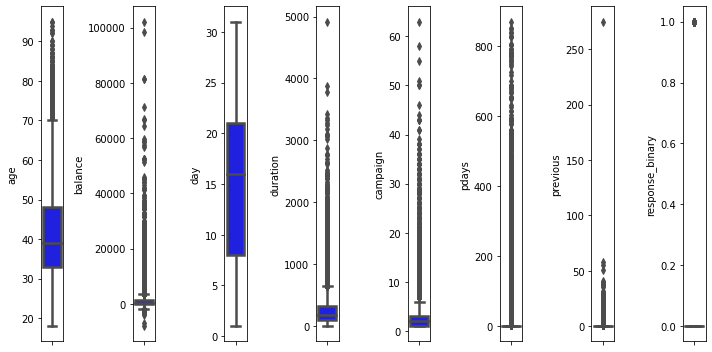

In [126]:
# Setelah di handling dengan metode IQR
plt.figure(figsize=(10,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_new[nums[i]],color='blue',orient='v')
    plt.tight_layout()

**Pengamatan**
hampir semua kolom ada outliers yang paling banyak ada pada kolom balance, duration, dan pdays kecuali day

##### Menggunakan Metode IQR

In [55]:
# handling outliear dengan metode iqr
outliers = ['age','balance','day', 'duration','campaign','pdays','previous']
Q1 = df_new[outliers].quantile(0.25)
Q3 = df_new[outliers].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
df_no = df_new[~((df[outliers]<(Q1 - 1.5*IQR)) | 
                 (df[outliers]>(Q3 + 1.5*IQR))).any(axis=1)]

In [56]:
print('Persentase data yang hilang : ', ((df_new.shape[0] - df_no.shape[0])/df_new.shape[0])*100)

Persentase data yang hilang :  37.64128198889651


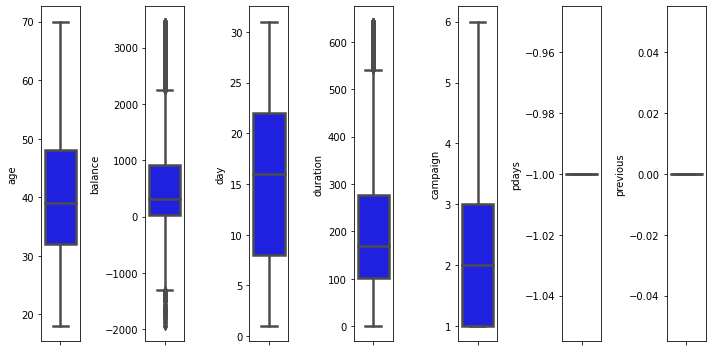

In [57]:
# Setelah di handling dengan metode IQR
plt.figure(figsize=(10,5))
for i in range(0, len(outliers)):
    plt.subplot(1, len(outliers), i+1)
    sns.boxplot(y=df_no[outliers[i]],color='blue',orient='v')
    plt.tight_layout()

##### Menggunakan Metode Z Score

In [146]:
z_score = np.abs(stats.zscore(df_new[outliers]))
no_outliers = df_new[~(z_score > 3).any(axis=1)]

In [59]:
print('Persentase data yang hilang : ', ((df_new.shape[0] - no_outliers.shape[0])/df_new.shape[0])*100)

Persentase data yang hilang :  11.06367919311672


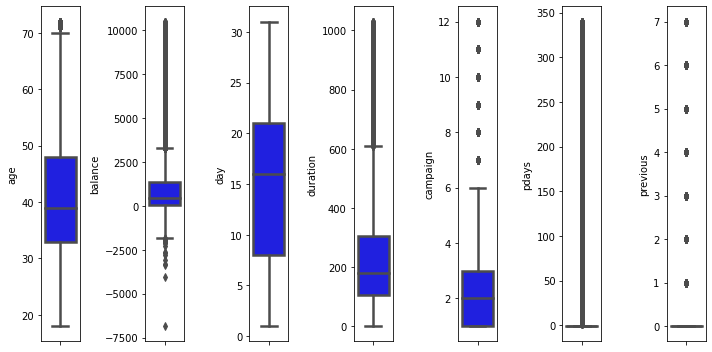

In [60]:
# Setelah di handling dengan metode IQR
plt.figure(figsize=(10,5))
for i in range(0, len(outliers)):
    plt.subplot(1, len(outliers), i+1)
    sns.boxplot(y=no_outliers[outliers[i]],color='blue',orient='v')
    plt.tight_layout()

**Pengamatan**
1. Metode IQR Lebih Banyak menghilangkan Outliers daripad Z-Score
2. Data Yang Hilang Lebih banyak menggunakan IQR daripada Z-Score
3. Apabila Outliers tidak ingin dihilangkan, gunakan model yang robust terhadap outliers

### Feature transformation

In [147]:
tf = vt.YeoJohnsonTransformer(variables = ['age', 'balance','day','duration','campaign','previous'])

In [148]:
tf.fit(no_outliers)

YeoJohnsonTransformer(variables=['age', 'balance', 'day', 'duration',
                                 'campaign', 'previous'])

In [149]:
df_yeo= tf.transform(no_outliers)

<AxesSubplot:>

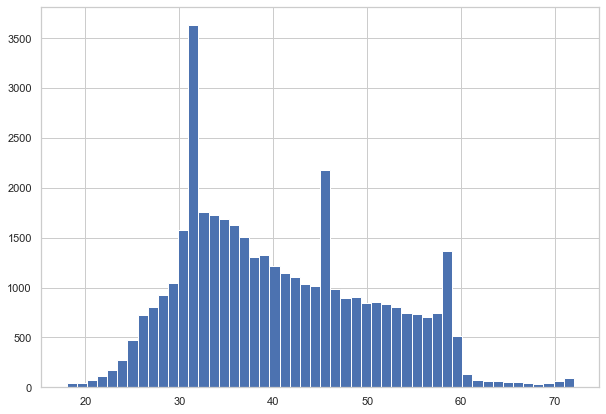

In [403]:
no_outliers['age'].hist(bins=50)

<AxesSubplot:>

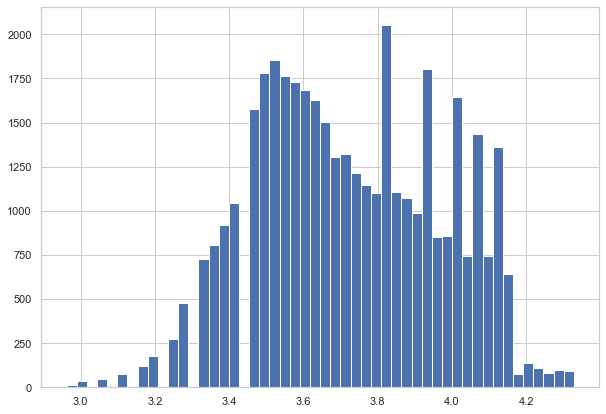

In [404]:
df_yeo['age'].hist(bins=50)

<AxesSubplot:>

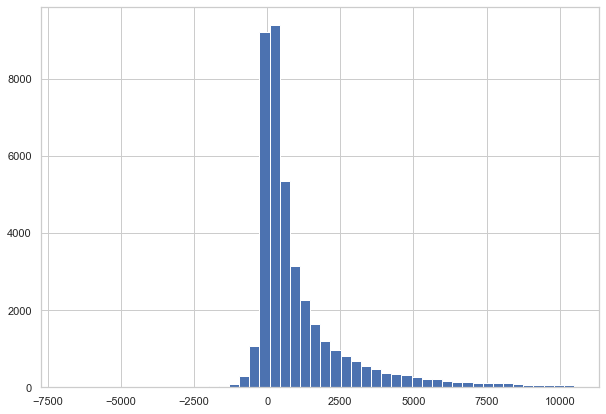

In [405]:
no_outliers['balance'].hist(bins=50)

<AxesSubplot:>

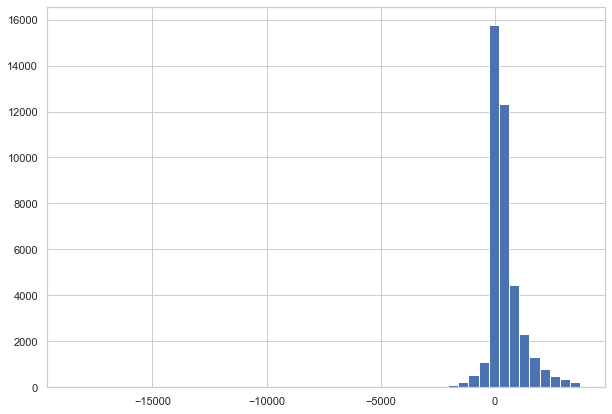

In [406]:
df_yeo['balance'].hist(bins=50)

<AxesSubplot:>

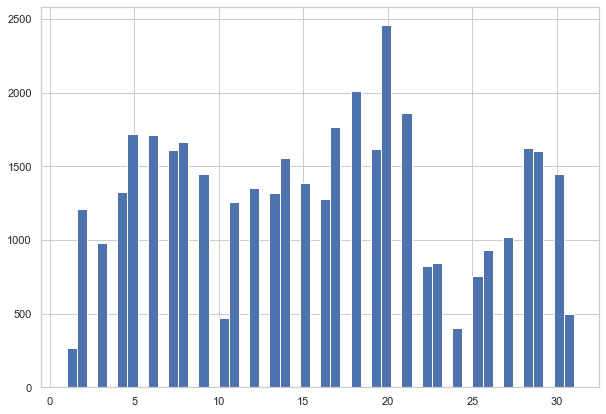

In [407]:
no_outliers['day'].hist(bins=50)

<AxesSubplot:>

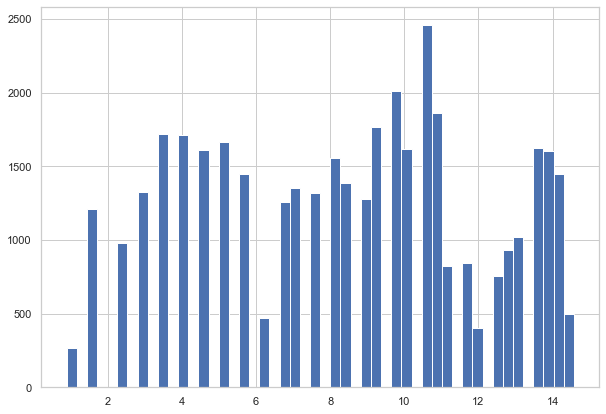

In [408]:
df_yeo['day'].hist(bins=50)

<AxesSubplot:>

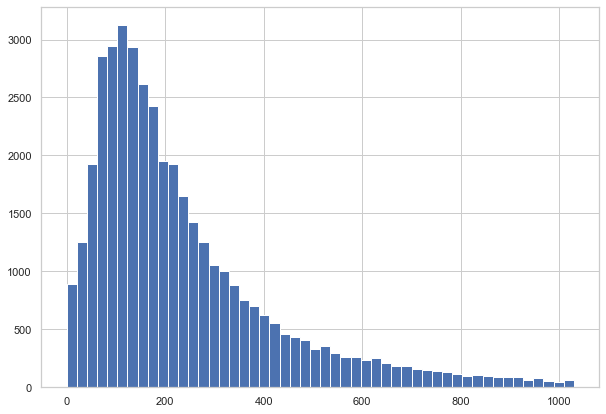

In [409]:
no_outliers['duration'].hist(bins=50)

<AxesSubplot:>

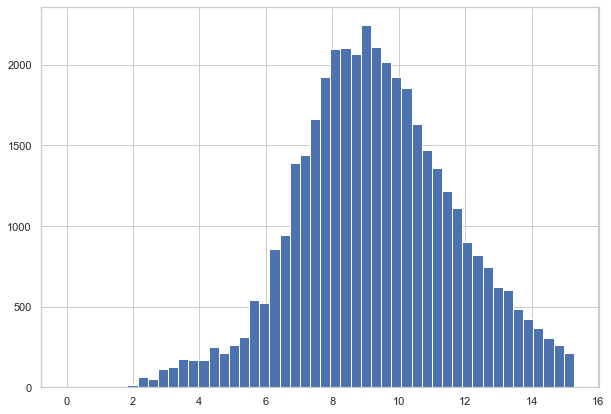

In [410]:
df_yeo['duration'].hist(bins=50)

<AxesSubplot:>

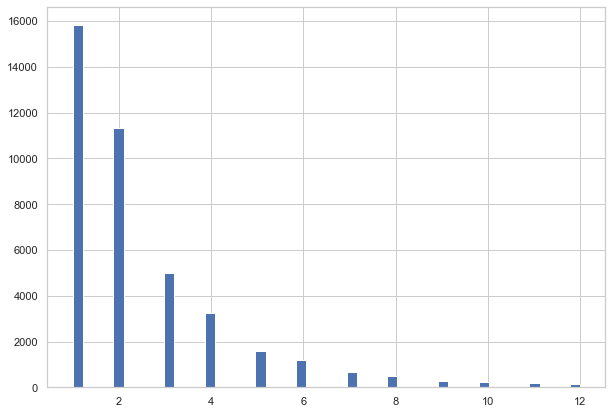

In [411]:
no_outliers['campaign'].hist(bins=50)

<AxesSubplot:>

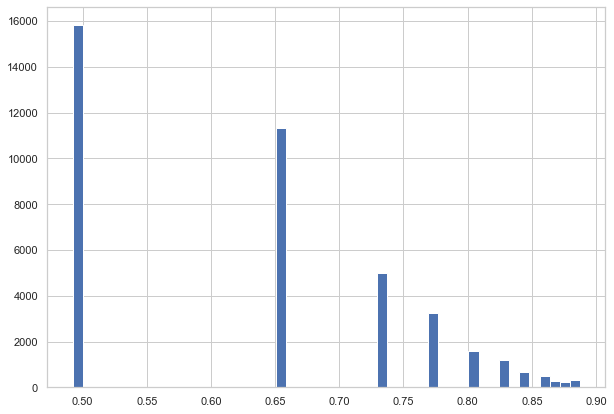

In [412]:
df_yeo['campaign'].hist(bins=50)

<AxesSubplot:>

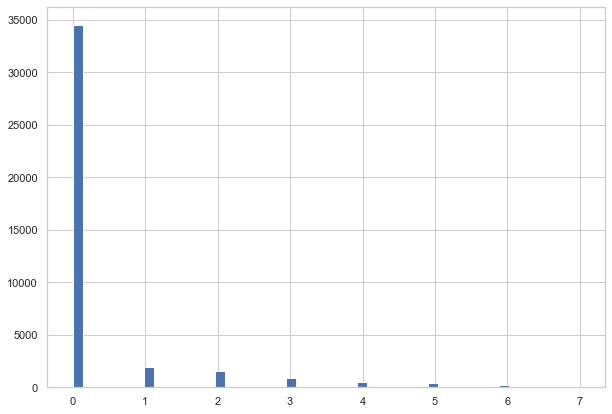

In [413]:
no_outliers['previous'].hist(bins=50)

<AxesSubplot:>

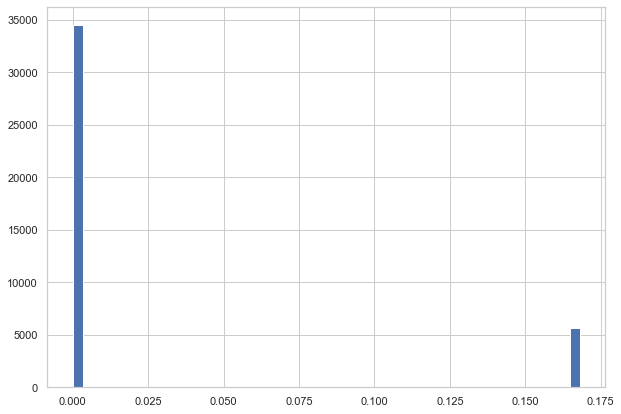

In [414]:
df_yeo['previous'].hist(bins=50)

In [150]:
no_outliers[['age','balance','day','duration','campaign','previous']].skew()

age         0.437393
balance     2.443248
day         0.080460
duration    1.589047
campaign    2.069523
previous    3.648407
dtype: float64

In [151]:
df_yeo[['age','balance','day','duration','campaign','previous']].skew()

age        -0.000242
balance     0.292575
day        -0.163492
duration    0.003130
campaign    0.205736
previous    2.057108
dtype: float64

#### Feature Rescalling

In [152]:
df_yeo['age_std']=StandardScaler().fit_transform(df_yeo['age'].values.reshape(len(df_yeo),1))
df_yeo['balance_std']=StandardScaler().fit_transform(df_yeo['balance'].values.reshape(len(df_yeo),1))
df_yeo['day_std']=StandardScaler().fit_transform(df_yeo['day'].values.reshape(len(df_yeo),1))
df_yeo['duration_std']=StandardScaler().fit_transform(df_yeo['duration'].values.reshape(len(df_yeo),1))
df_yeo['campaign_std']=StandardScaler().fit_transform(df_yeo['campaign'].values.reshape(len(df_yeo),1))
df_yeo['previous_std']=StandardScaler().fit_transform(df_yeo['previous'].values.reshape(len(df_yeo),1))

In [153]:
df_yeo[['age_std','balance_std','day_std','duration_std','campaign_std','previous_std']].skew()

age_std        -0.000242
balance_std     0.292575
day_std        -0.163492
duration_std    0.003130
campaign_std    0.205736
previous_std    2.057108
dtype: float64

In [69]:
df_yeo[['age_std','balance_std','day_std','duration_std','campaign_std','previous_std']].describe()

,age_std,balance_std,day_std,duration_std,campaign_std,previous_std
count,4.020900e+04,4.020900e+04,4.020900e+04,4.020900e+04,4.020900e+04,4.020900e+04
mean,1.229918e-15,-3.392877e-17,-3.449425e-16,5.753755e-16,5.315508e-16,-2.261918e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-3.122030e+00,-2.540235e+01,-2.072288e+00,-3.918800e+00,-1.104950e+00,-4.060293e-01
25%,-7.200403e-01,-5.086660e-01,-9.007072e-01,-6.537268e-01,-1.104950e+00,-4.060293e-01
50%,-4.818557e-02,-2.607564e-01,1.039644e-01,-4.172710e-02,1.677085e-01,-4.060293e-01
75%,7.914045e-01,2.655565e-01,6.559455e-01,6.487036e-01,7.927780e-01,-4.060293e-01
max,2.442663e+00,4.452373e+00,1.656931e+00,2.505753e+00,2.050705e+00,2.480224e+00


## Feature Engineering
(menentukan feature apa saja yang akan digunakan, feature apa yang perlu ditambahkan, dan reformatting feature sesuai kebutuhan)

### Kategorikal

<AxesSubplot:>

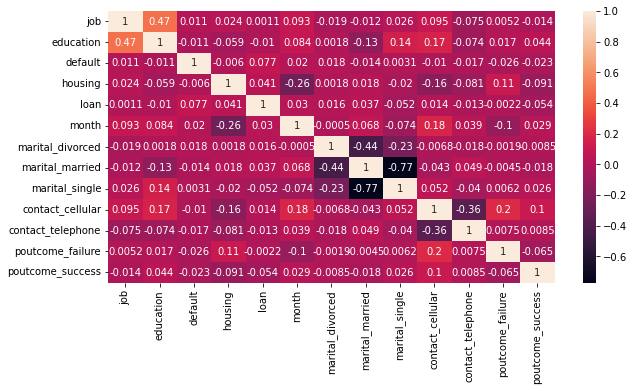

In [131]:
# Korelasi antarfitur dan fitur dengan target
plt.figure(figsize=(10,5))
sns.heatmap(x_cat.corr(method='spearman'),annot=True) 

**Observation:**<br>
- Tidak ada feature yang > 0.7 / redudan <br>

**Normalisasi dengan Chi-Square :**

In [132]:
x_cat.skew()

job                 -0.402782
education           -0.627405
default              7.245375
housing             -0.224766
loan                 1.852617
month                0.242842
marital_divorced     2.411075
marital_married     -0.416493
marital_single       0.964070
contact_cellular    -0.618604
contact_telephone    3.553497
poutcome_failure     2.519297
poutcome_success     5.192072
dtype: float64

In [133]:
# bikin var untuk scaling 

scaler = MinMaxScaler()

In [134]:
# Normalisasi Data Feature Kategorikal
# melakukan fit dan transform method untuk data feature kategorikal

x_catnormls = scaler.fit_transform(x_cat)


In [135]:
# Pakai Chi Square Test

chi_score, pvalue = chi2(x_catnormls, y_cat)

In [137]:
#Cek pvalue dari feature kategori dari hasil test

h1_feature = []

for i in range(len(category)):
    print('Feature kategori', category[i], ': ', 'pvalue ', pvalue[i])
    if pvalue[i] < 0.05:
        print(category[i], ':', 'P-Value < 0.05')
    else:
        print(category[i], ':', 'P-Value > 0.05')
        h1_feature.append(category[i])
print('------------------------------------------------------------')    
print('Feature kategori baik jika P-Value < 0.05')


Feature kategori job :  pvalue  0.03372221745889438
job : P-Value < 0.05
Feature kategori education :  pvalue  0.0006284288059475995
education : P-Value < 0.05
Feature kategori default :  pvalue  2.315276765388257e-06
default : P-Value < 0.05
Feature kategori housing :  pvalue  1.4012848034921748e-86
housing : P-Value < 0.05
Feature kategori loan :  pvalue  2.793375244102348e-40
loan : P-Value < 0.05
Feature kategori month :  pvalue  0.20269141682294703
month : P-Value > 0.05
Feature kategori marital_divorced :  pvalue  0.5792358741763968
marital_divorced : P-Value > 0.05
Feature kategori marital_married :  pvalue  6.262225246148971e-16
marital_married : P-Value < 0.05
Feature kategori marital_single :  pvalue  2.6896992575199514e-30
marital_single : P-Value < 0.05
Feature kategori contact_cellular :  pvalue  6.626455402949622e-66
contact_cellular : P-Value < 0.05
Feature kategori contact_telephone :  pvalue  0.0038735394668939905
contact_telephone : P-Value < 0.05
Feature kategori pou

**Observation:**<br>
- Semua feature kategorikal terpakai karena nilai P-Value kurang dari 0.05 kecuali month dan marital_divorced <br>

### Numerikal

<AxesSubplot:>

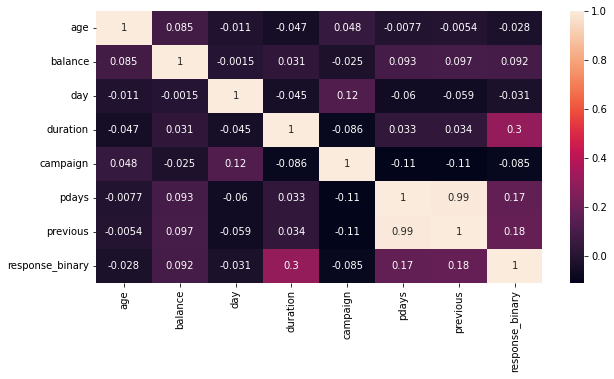

In [154]:
# Korelasi antarfitur dan fitur dengan target
plt.figure(figsize=(10,5))
sns.heatmap(no_outliers[nums].corr(method='spearman'),annot=True) 

**Observations:**<br>
Fitur pdays dan previous saling redundan (multikolinearitas) karena memiliki korelasi yang sangat tinggi sehingga harus dihapus salah satu.

In [155]:
no_outliers.drop('pdays', axis = 1, inplace = True)

C:\Users\Imran Nas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Uji Pengaruh Fitur dengan Target

In [156]:
# Uji Pengaruh Fitur Age dengan Target
anova_age = st.f_oneway(df_yeo['age_std'],df_yeo['response_binary'])
pvalue_age = anova_age.pvalue
print(pvalue_age)
if pvalue_age >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

2.6755805105086777e-83
Sufficient Reject H0


In [157]:
# Uji Pengaruh Fitur Balance dengan Target
anova_balance = st.f_oneway(df_yeo['balance_std'],df_yeo['response_binary'])
pvalue_balance = anova_balance.pvalue
print(pvalue_balance)
if pvalue_balance >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

2.6755805105086777e-83
Sufficient Reject H0


In [158]:
# Uji Pengaruh Fitur Day dengan Target
anova_day = st.f_oneway(df_yeo['day_std'],df_yeo['response_binary'])
pvalue_day = anova_day.pvalue
print(pvalue_day)
if pvalue_day >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

2.6755805104843432e-83
Sufficient Reject H0


In [159]:
# Uji Pengaruh Fitur Duration dengan Target
anova_duration = st.f_oneway(df_yeo['duration_std'],df_yeo['response_binary'])
pvalue_duration = anova_duration.pvalue
print(pvalue_duration)
if pvalue_duration >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

2.6755805105086777e-83
Sufficient Reject H0


In [160]:
# Uji Pengaruh Fitur Campaign dengan Target
anova_campaign = st.f_oneway(df_yeo['campaign_std'],df_yeo['response_binary'])
pvalue_campaign = anova_campaign.pvalue
print(pvalue_campaign)
if pvalue_campaign >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

2.6755805105086777e-83
Sufficient Reject H0


In [161]:
# Uji Pengaruh Fitur Previous dengan Target
anova_previous = st.f_oneway(df_yeo['previous_std'],df_yeo['response_binary'])
pvalue_previous = anova_previous.pvalue
print(pvalue_previous)
if pvalue_previous >= 0.05:
 print('Insufficient Reject H0')
else:
 print('Sufficient Reject H0')

2.6755805104843432e-83
Sufficient Reject H0


In [162]:
# Uji Pengaruh Fitur Previous dengan Target
mann_previous=stats.mannwhitneyu(df_yeo['previous_std'],df_yeo['response_binary'], alternative='two-sided')
mann_pvalue_previous = mann_previous.pvalue
print(mann_pvalue_previous)
if mann_pvalue_previous >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

0.0
Sufficient Reject H0


**Observation:**<br>
- Fitur numerik (age, balance, day, duration, campaign, previous) berpengaruh signifikan terhadap target, <br>
  sehingga tidak ada fitur numerik yang di drop.<br>
- Fitur pdays di drop karena redundan dengan fitur previous.

#### Feature Extraction<br>
Untuk saat ini belum ada feature extraction, tetapi apabila nanti model yang dihasilkan masih kurang bagus, <br>
akan dicoba untuk ditambahkan fitur-fitur baru, misalnya:
1. fitur year (di dataset ini tidak ada fitur year, namun karena dataset sudah urut saat dilihat dari excel, maka bisa ditambahkan fitur year secara manual menggunakan excel.
2. fitur day diubah menjadi awal bulan, pertengahan bulan, dan akhir bulan. Hal ini didasarkan pada distribusi trimodal fitur day.
3. fitur month diubah berdasarkan musim atau dibagi per kuartal.
4. fitur age diubah berdasarkan kelompok usia pekerja.

### Handling Class Imbalance

In [163]:
yeo_df = df_yeo[['age_std','balance_std','day_std','duration_std','campaign_std','previous_std']]

In [164]:
nums = ['age','balance','day','duration','campaign','previous']

In [165]:
# merge yeo_df and x_cat
df_merge = x_cat.merge(yeo_df, left_index= True, right_index= True)
df_merge = df_merge.merge(y_cat, left_index= True, right_index= True)
df_merge.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'month',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_success', 'age_std', 'balance_std', 'day_std', 'duration_std',
       'campaign_std', 'previous_std', 'response_binary'],
      dtype='object')

In [166]:
#hapus kolom kategorikal yg alpha > 0.05
df_merge.drop(h1_feature, axis = 1, inplace = True)

In [167]:
df_merge

,job,education,default,housing,loan,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_success,age_std,balance_std,day_std,duration_std,campaign_std,previous_std,response_binary
0,11,3,0,1,0,1,0,0,0,0,0,1.560353,0.684809,-1.344488,0.437911,-1.104950,-0.406029,0
1,8,2,0,1,0,0,1,0,0,0,0,0.439011,-0.539258,-1.344488,-0.236436,-1.104950,-0.406029,0
2,10,2,0,1,1,1,0,0,0,0,0,-0.720040,-0.565283,-1.344488,-0.980153,-1.104950,-0.406029,0
3,7,0,0,1,0,1,0,0,0,0,0,0.706068,0.352214,-1.344488,-0.783917,-1.104950,-0.406029,0
4,0,0,0,0,0,0,1,0,0,0,0,-0.720040,-0.566481,-1.344488,0.087913,-1.104950,-0.406029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,3,3,0,0,0,0,1,1,0,0,0,-2.158432,-0.472812,0.217941,0.462695,-1.104950,-0.406029,1
45205,8,2,0,0,1,0,1,1,0,0,0,-1.828064,-0.214309,0.217941,0.969180,0.167708,-0.406029,1
45206,8,3,0,0,0,1,0,1,0,0,0,1.037379,-0.024486,0.217941,2.414946,0.792778,-0.406029,1
45207,2,1,0,0,0,0,0,1,0,0,0,2.385483,0.470353,0.217941,1.208771,0.167708,-0.406029,1


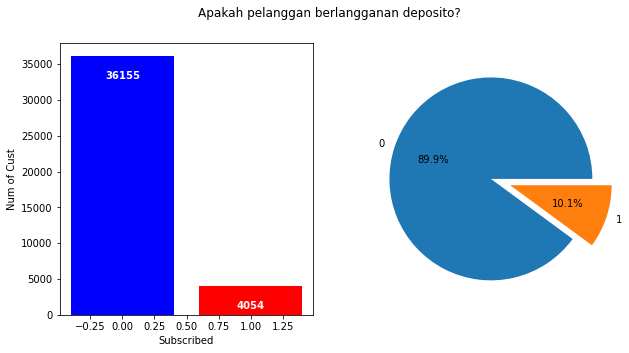

In [168]:
#plot variabel target
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Apakah pelanggan berlangganan deposito?')
ax[0].bar(df_merge['response_binary'].value_counts().index, df_merge['response_binary'].value_counts(), color=['b','r'])
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   xytext=(0, -20),
                   textcoords='offset points', weight='bold', color='white')
ax[1].pie(x=df_merge['response_binary'].value_counts(), labels=df_merge['response_binary'].value_counts().index, autopct='%.1f%%', explode=(0,0.2))
ax[0].set_ylabel('Num of Cust')
ax[0].set_xlabel('Subscribed')
plt.show()

terlihat label target imbalanced data dengan kategori Moderate

In [169]:
#pemisahan feature dan target
X = df_merge.drop('response_binary', axis=1)
y = df_merge['response_binary']

### StratifiedKFold

In [170]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
	# select rows
	train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
	train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
	test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
	print('>Train: 0={}, 1={}, Test: 0={}, 1={}'.format(train_0, train_1, test_0, test_1))

>Train: 0=28924, 1=3243, Test: 0=7231, 1=811
>Train: 0=28924, 1=3243, Test: 0=7231, 1=811
>Train: 0=28924, 1=3243, Test: 0=7231, 1=811
>Train: 0=28924, 1=3243, Test: 0=7231, 1=811
>Train: 0=28924, 1=3244, Test: 0=7231, 1=810


In [171]:
train_y.value_counts()

0    28924
1     3244
Name: response_binary, dtype: int64